# Explorative Data Analysis of Telecom Data
 

#### Import libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load telecom dataset


In [23]:
file_path = 'Dataset\\telecom_customer_churn.csv'
churn_data = pd.read_csv(file_path)

### Dataset Structure and Basic Info

Here, we explore the structure of the dataset by checking the number of columns, their data types, and missing values.


In [24]:
churn_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [25]:
churn_data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


#### Observations:
-**Zip Code, Latitude, and Longitude**: these are locations of customers and vary over a large range
-Avg age of customers is 46.5
-The average customer tenure is about **32 months**, with a minimum of **1 month** and a maximum of **72 months**.
- There is quite a variantion in tenure with the twenty fifth percentile at **nine months** and the seventy fifth percentile at **fifty five months**. This suggests a few clients are noticeably new, at the same time as others have been with the company for a long time.

**Monthly and Total Charges**:
   - The **mean monthly charge** is approximately **£63.60**, but there are customers with negative charges (minimum: -10). Will need to look into this more
   - The **total charges** vary widely, ranging from **£18.80 to £8684.80**. 
   - Similarly, there’s a notable spread in total charges, evident from the large standard deviation.

**Total Refunds**:
   - Most customers do not receive refunds, as indicated by the mean value of **£1.96** and a 50th percentile of **£0.00**.
   - However a few customer get some significant refund.


### Check for missing values in the dataset

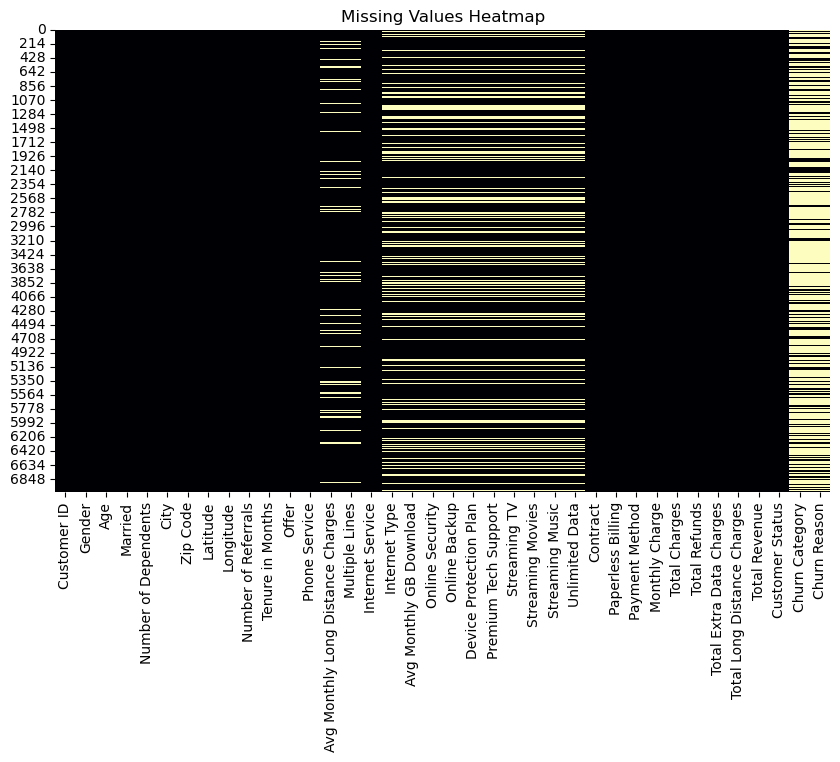

In [26]:
# heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(churn_data.isnull(), cbar=False, cmap='magma')
plt.title("Missing Values Heatmap")
plt.show()


##### Heatmap observations
- The Heatmap shows several missing values:
    - **Churn_reason**: Many missing values, may require nullifying this as its use would be very limited.
    - **Avg Monthly Long Distance Charges**, **Avg Monthly GB Download**, and **Total Refunds** also have some missing values.
    -`Customer ID`, `Gender`, `Marital Status`, and `Tenure in Months` have no missing values, which is very good.
    

## Distribution of Churn Categories

visualise the disrubution of different churn reasons, despite there being many missing values for this.



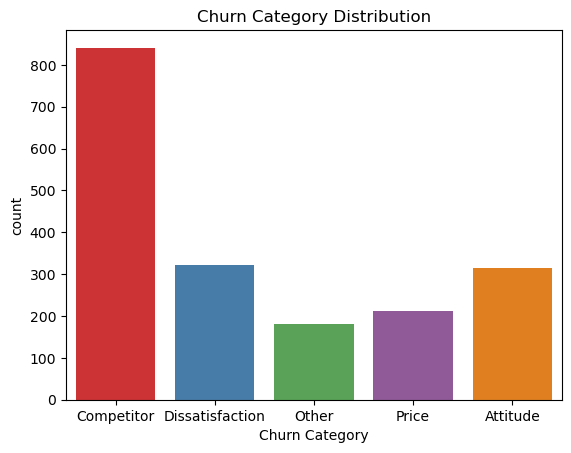

In [27]:
# Visualise the distribution of the target variable (Churn Category)
sns.countplot(x='Churn Category', data=churn_data, palette='Set1')
plt.title('Churn Category Distribution')
plt.show()


##### Churn Category Distribution Analysis

- **Competitor**: Largest churn reason (~850), suggesting high competition in the market.
- **Dissatisfaction**: Second-highest (~300), indicating customer service or product experience issues.
- **Attitude**: similar number as dissatisfaction (~200), shows that perception and brand sentiment affects churn.
- **Price**: Relatively lower impact (~150), showing fewer customers leave due to cost. Price and competitor could go hand-hand.A 
competitor could have a better price than current plan causing customers to churn.
- **Other**: Lowest (~100), covering miscellaneous reasons not covered by specific categories.

This distribution highlights that external competition is the dominant churn factor, followed by customer dissatisfaction and attitude.
key note is that price could contribute to competitor churn

    

## Distributions of Key Numerical Features

Here I will create a visual distribution of numerical variables such as Tenure, Monthly Charge, and Total Charges to understand their spread.



Text(0.5, 1.0, 'Tenure in Months')

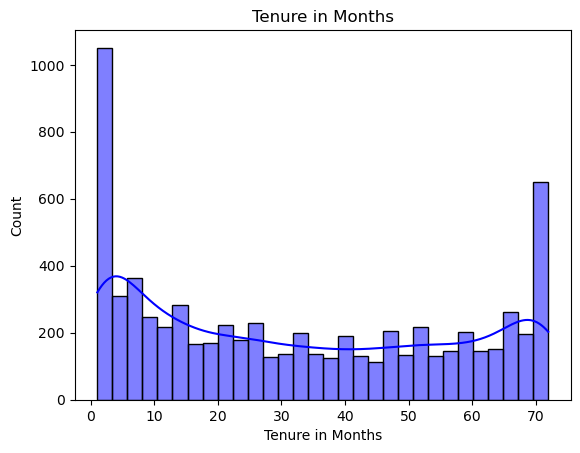

In [31]:

sns.histplot(churn_data['Tenure in Months'], bins=30, kde=True, color='blue')
plt.title('Tenure in Months')


Text(0.5, 1.0, 'Total charges')

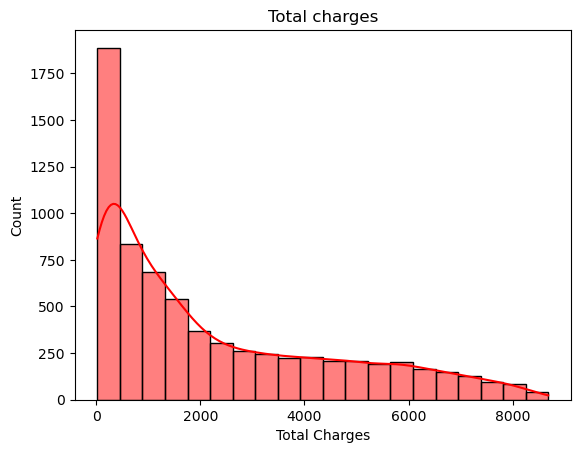

In [37]:
sns.histplot(churn_data['Total Charges'], bins=20, kde=True, color='red')
plt.title('Total charges')

Text(0.5, 1.0, 'Monthly Charges')

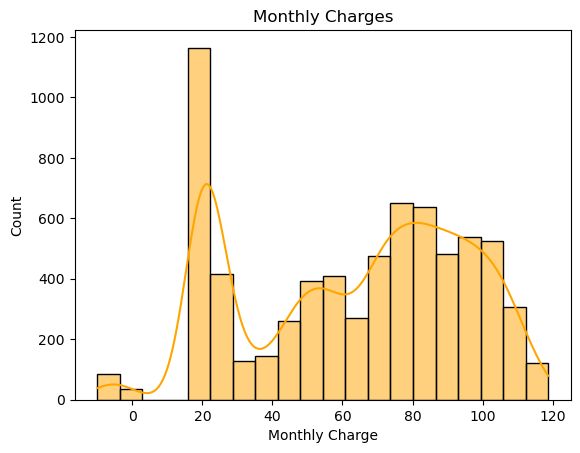

In [42]:
sns.histplot(churn_data['Monthly Charge'], bins=20, kde=True, color='Orange')
plt.title('Monthly Charges')

### Observations on Monthly and Total Charges

#### 1. **Monthly Charges:**
- The distribution is **bimodal**, with peaks around **$20** and **$70-$80**.
- A large portion of customers pay low charges, likely for basic services, while another group pays higher charges, suggesting tiered service plans.
- Most customers are clustered around lower and mid-range charges, but there are a small number of customers paying much higher charges (possibly for premium services or extra usage).

#### 2. **Total Charges:**
- The distribution is **right-skewed**, with most customers having low total charges.
- A significant group has **zero or minimal total charges**, which possibly indicates new or recently churned customers.
- The number of customers decreases sharply after **$6000**, showing that high cumulative charges are uncommon.




### Realised an issue before carrying out further exploration.
- The amount of rows missing data means it would be hard to explore relationships between features.
-

In [43]:
missing_values = churn_data.isnull().sum()
print(missing_values[missing_values > 0])  # Only display columns with missing values

Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Churn Category                       5174
Churn Reason                         5174
dtype: int64
